# EDA ON NER OUTPUT

In [10]:
import json
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
with open("../data/tagged_citations.jsonl", "r", encoding="utf-8") as f:
    data = [json.loads(line) for line in f]


total_entries = len(data)
label_counts = Counter(entry["label"] for entry in data)
citation_entries = [entry for entry in data if entry["label"] == "CITATION" and "tags" in entry]
tag_counter = Counter()
token_lengths = []

for entry in citation_entries:
    tokens = entry["tags"]
    token_lengths.append(len(tokens))
    for tok in tokens:
        tag_counter[tok["tag"]] += 1

total_citations = len(citation_entries)
avg_tokens = sum(token_lengths) / total_citations if total_citations > 0 else 0
min_tokens = min(token_lengths) if token_lengths else 0
max_tokens = max(token_lengths) if token_lengths else 0

print("Dataset Overview")
print(f"- Total entries: {total_entries}")
print(f"- CITATION entries: {label_counts['CITATION']}")
print(f"- NOT_CITATION entries: {label_counts['NOT_CITATION']}")
print(f"- Average tokens per CITATION: {avg_tokens:.2f}")
print(f"- Minimum tokens in a CITATION: {min_tokens}")
print(f"- Maximum tokens in a CITATION: {max_tokens}")
print(f"- Unique tags used: {len(tag_counter)}")

tag_freq_df = pd.DataFrame(tag_counter.items(), columns=["Tag", "Count"]).sort_values(by="Count", ascending=False)
tag_freq_df.reset_index(drop=True, inplace=True)
total_tags = sum(tag_counter.values())
avg_tags_per_entry = total_tags / total_entries if total_entries else 0
most_common_tag, most_common_count = tag_counter.most_common(1)[0]

summary_stats = {
    "Total citations": total_entries,
    "Total tags": total_tags,
    "Average tags per citation": round(avg_tags_per_entry, 2),
    "Most common tag": most_common_tag,
    "Most common tag count": most_common_count,
    "Unique tags": len(tag_counter)
}


print("\nTag Frequency Table:")
print(tag_freq_df)
print("\nSummary Statistics:")
for k, v in summary_stats.items():
    print(f"{k}: {v}")


Dataset Overview
- Total entries: 28880
- CITATION entries: 28880
- NOT_CITATION entries: 0
- Average tokens per CITATION: 24.02
- Minimum tokens in a CITATION: 2
- Maximum tokens in a CITATION: 126
- Unique tags used: 29

Tag Frequency Table:
                   Tag   Count
0                    O  331648
1       I-Aktenzeichen   74713
2              I-Datum   72222
3            B-Gericht   21427
4              B-Datum   19753
5       B-Aktenzeichen   17987
6       B-Seite-Beginn   16732
7              B-Autor   16370
8         B-Randnummer   14954
9        B-Zeitschrift   14794
10              B-Jahr   13226
11           I-Gericht   12875
12         I-Paragraph   12663
13         B-Paragraph    9003
14            B-Gesetz    7724
15           B-Auflage    7153
16       I-Zeitschrift    5399
17             I-Titel    4877
18  B-Seite-Fundstelle    4066
19            B-Nummer    4037
20             B-Titel    3350
21        I-Randnummer    2839
22            B-Editor    2392
23          

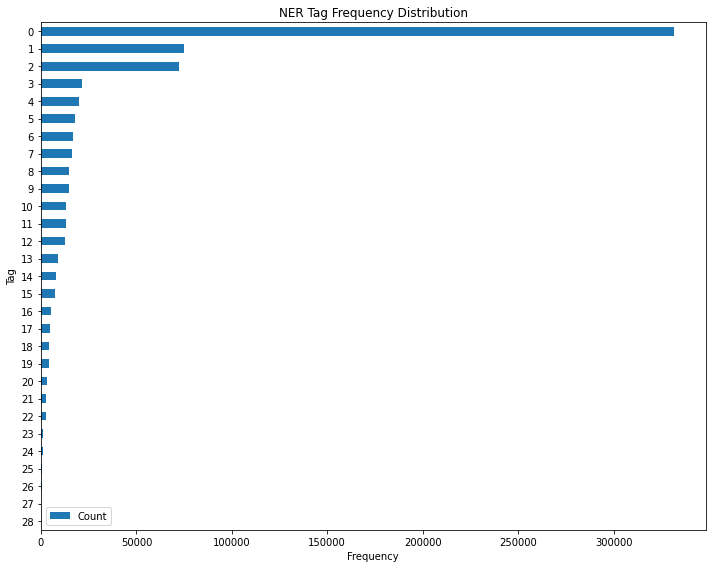

In [14]:
tag_freq_df.sort_values(by="Count", ascending=True).plot(kind="barh", figsize=(10, 8), title="NER Tag Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Tag")
plt.tight_layout()
plt.show()
